# **Project 4 Report**

JALPA KAILA

CS658

## **P4-1. Hierarchical Clustering Dendrogram**

**(a) Randomly generate the following data points:<br>
import numpy as np<br>
np.random.seed(0)<br>
X1 = np.random.randn(50,2)+[2,2]<br>
X2 = np.random.randn(50,2)+[6,10]<br>
X3 = np.random.randn(50,2)+[10,2]<br>
X = np.concatenate((X1,X2,X3)).**

In [16]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Generate the data points
X1 = np.random.randn(50, 2) + [2, 2]
X2 = np.random.randn(50, 2) + [6, 10]
X3 = np.random.randn(50, 2) + [10, 2]

# Concatenate all data points into a single array
X = np.concatenate((X1, X2, X3))

# Display the shape of the resulting data to verify
print("Shape of X:", X.shape)


Shape of X: (150, 2)


Above code generates three distinct sets of 2D data points, each centered around different coordinates, and then combines them into a single dataset. First, it sets a random seed to ensure reproducibility of the results. Then, it creates three sets of data points: X1 is centered around (2, 2), X2 around (6, 10), and X3 around (10, 2), each consisting of 50 points. These sets are then concatenated into a single 150x2 array which represents a combined dataset with three clusters of points distributed in different regions of the 2D space. The shape of the resulting dataset is printed to verify that it contains 150 points with 2 features each.

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a). Plot your Dendrogram using different linkage{“ward”, “complete”, “average”, “single”}.**

Instructions: Set distance_threshold=0, n_clusters=None in AgglomerativeClustering. The default metric used to compute the linkage is ‘euclidean’, so you do not need to change this parameter.

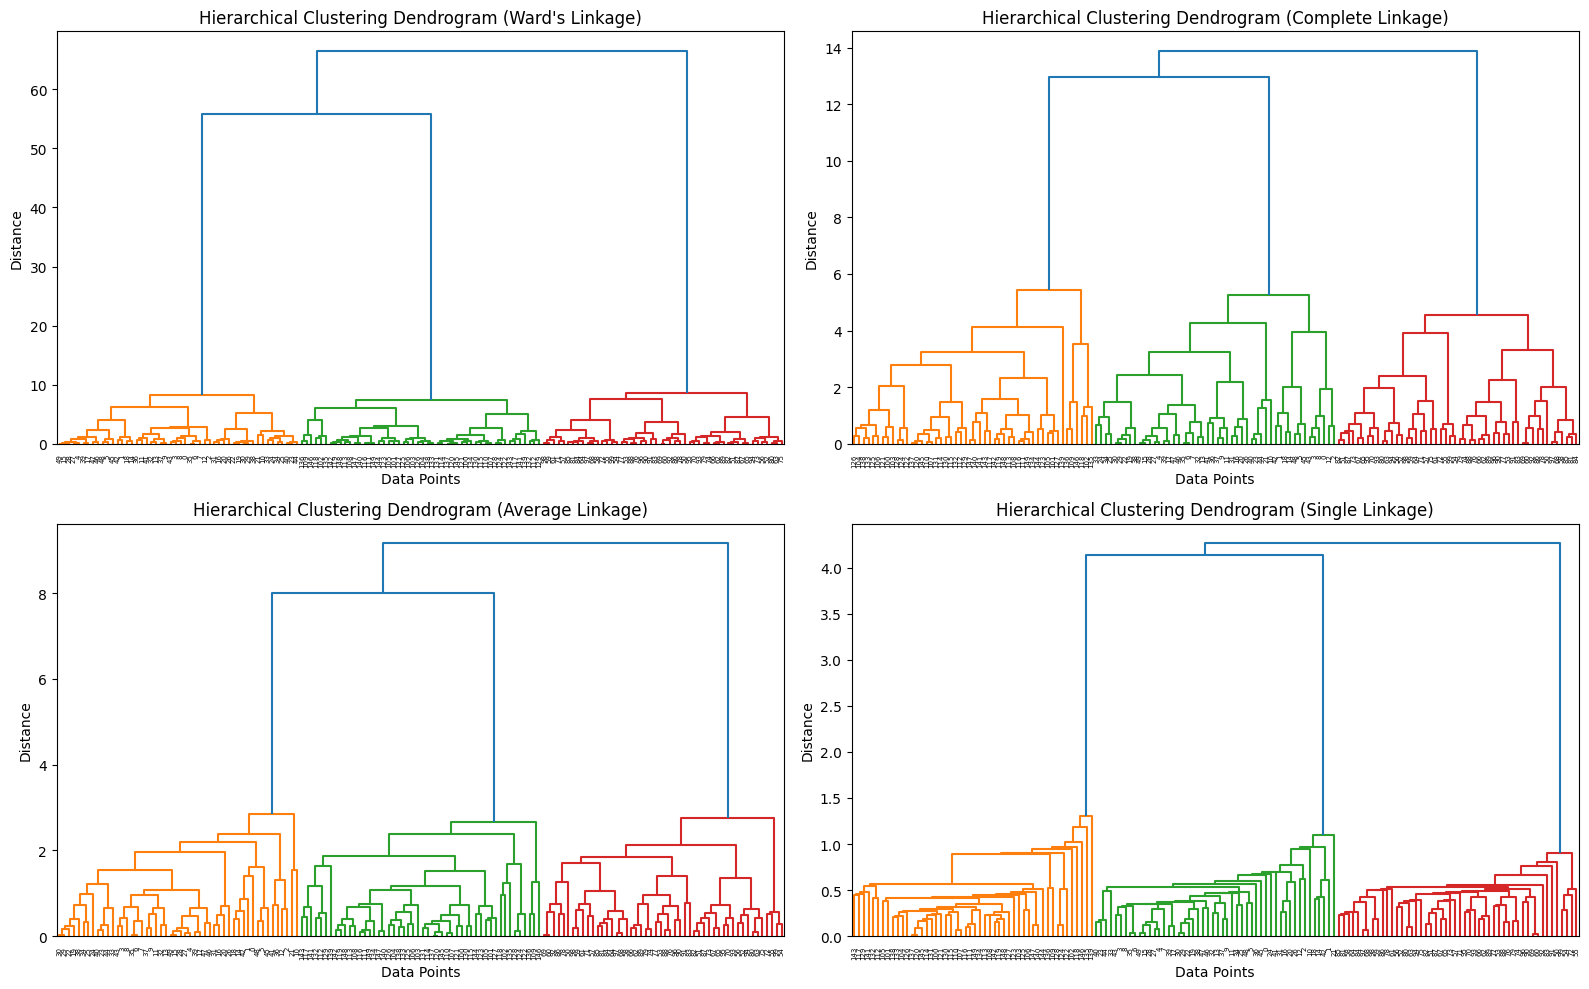

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Set random seed for reproducibility
np.random.seed(0)

# Generate data points
X1 = np.random.randn(50, 2) + [2, 2]
X2 = np.random.randn(50, 2) + [6, 10]
X3 = np.random.randn(50, 2) + [10, 2]
X = np.concatenate((X1, X2, X3))

# Linkage methods to use
methods = ['ward', 'complete', 'average', 'single']

# Perform hierarchical clustering with different linkage methods using AgglomerativeClustering
clustering_ward = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clustering_complete = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
clustering_average = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='average')
clustering_single = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='single')

# Fit the model to the data
clustering_ward.fit(X)
clustering_complete.fit(X)
clustering_average.fit(X)
clustering_single.fit(X)

# Generate linkage matrices for plotting dendrograms
linked_ward = linkage(X, method='ward')
linked_complete = linkage(X, method='complete')
linked_average = linkage(X, method='average')
linked_single = linkage(X, method='single')

# Create subplots
plt.figure(figsize=(16, 10))

# Plot dendrogram for Ward's Linkage
plt.subplot(2, 2, 1)
dendrogram(linked_ward, orientation='top', distance_sort='descending', show_leaf_counts=False)
# dendrogram(linked_ward, orientation='right', distance_sort='descending', show_leaf_counts=False)
# dendrogram(linked_ward, truncate_mode="level", p=3, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Ward's Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram for Complete Linkage
plt.subplot(2, 2, 2)
dendrogram(linked_complete, orientation='top', distance_sort='descending', show_leaf_counts=False)
# dendrogram(linked_complete, orientation='right', distance_sort='descending', show_leaf_counts=False)
# dendrogram(linked_complete, truncate_mode="level", p=3, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram for Average Linkage
plt.subplot(2, 2, 3)
dendrogram(linked_average, orientation='top', distance_sort='descending', show_leaf_counts=False)
# dendrogram(linked_average, orientation='right', distance_sort='descending', show_leaf_counts=False)
# dendrogram(linked_average, truncate_mode="level", p=3, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Plot dendrogram for Single Linkage
plt.subplot(2, 2, 4)
dendrogram(linked_single, orientation='top', distance_sort='descending', show_leaf_counts=False)
# dendrogram(linked_single, orientation='right', distance_sort='descending', show_leaf_counts=False)
# dendrogram(linked_single, truncate_mode="level", p=3, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# Display the plots
plt.tight_layout()
plt.show()


The above code performs hierarchical clustering on a dataset with three clusters of 2D points and generates dendrograms using four different linkage methods: Ward's, complete, average, and single. The code utilizes the AgglomerativeClustering class from sklearn to fit the clustering models and the linkage function from scipy to compute the hierarchical clustering structures.
First, the random seed is set for reproducibility, and the dataset is generated by creating three sets of points with distinct centers. Four AgglomerativeClustering models are initialized with different linkage methods (ward, complete, average, single), and each model is fitted to the dataset. The linkage function is then used to generate the linkage matrices needed to create the dendrograms for each method.
The code generates a 2x2 grid of dendrograms, each representing hierarchical clustering using different linkage methods. From this visualization we can compares how data points are merged into clusters, with each plot labeled by the linkage method. For better visualization experiment is performed with different orientation such as right, top and different trucate level.

# **P4-2. Clustering the handwritten digits data**

Use the hand-written digits dataset embedded in scikit-learn:<br>
from sklearn import datasets<br>
digits = datasets.load_digits()

**(a) Use the following methods to cluster the data:<br>
• K-Means (sklearn.cluster.KMeans)<br>
• DBSCAN (sklearn.cluster.DBSCAN)<br>
Optimize the parameters of these methods.**

In [14]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

def explore_kmeans_parameters(x, n_clusters_range=(2, 13), tol_range=np.logspace(-5, -1, 5)):
    for n_clusters in range(*n_clusters_range):
        for tol in tol_range:
            kmeans_model = KMeans(n_clusters=n_clusters, tol=tol)
            labels = kmeans_model.fit_predict(x)
            score = adjusted_rand_score(y, labels)
            print(f"KMeans_n_clusters_{n_clusters}_tol_{tol:.0e}: \t{score}")

def explore_dbscan_parameters(x, min_samples=2):
    for eps in np.arange(0.7, 2.1, 0.1):
        dbscan_model = DBSCAN(min_samples=min_samples, eps=eps)
        labels = dbscan_model.fit_predict(x)
        score = adjusted_rand_score(y, labels)
        print(f"DBSCAN_eps_{eps:.1f}: \t{score}")

def evaluate_kmeans_models(x, kmeans_models):
    for name, model in kmeans_models.items():
        labels = model.fit_predict(x)
        score = adjusted_rand_score(y, labels)
        print(f"{name}: \t{score}")

def evaluate_dbscan_models(x, dbscan_models):
    for name, model in dbscan_models.items():
        labels = model.fit_predict(x)
        score = adjusted_rand_score(y, labels)
        print(f"{name}: \t{score}")

if __name__ == "__main__":
    # Load digits dataset
    digits = load_digits()
    x1, y = digits.data, digits.target

    # Dimensionality reduction using PCA
    pca = PCA(n_components=2)
    x = pca.fit_transform(x1)
    print(f"Dimensionality reduced from {x1.shape[1]} to {x.shape[1]}")

    # Explore DBSCAN parameters (eps)
    explore_dbscan_parameters(x)

    # Explore K-Means parameters (n_clusters and tolerance)
    explore_kmeans_parameters(x)

Dimensionality reduced from 64 to 2
DBSCAN_eps_0.7: 	0.02187066475781566
DBSCAN_eps_0.8: 	0.04887156708298619
DBSCAN_eps_0.9: 	0.10275431929168855
DBSCAN_eps_1.0: 	0.1438786740788161
DBSCAN_eps_1.1: 	0.17875589692440208
DBSCAN_eps_1.2: 	0.21404431617555977
DBSCAN_eps_1.3: 	0.19291148183266071
DBSCAN_eps_1.4: 	0.12658311393618332
DBSCAN_eps_1.5: 	0.129699717872804
DBSCAN_eps_1.6: 	0.1273190609580991
DBSCAN_eps_1.7: 	0.12642077272474136
DBSCAN_eps_1.8: 	0.00013136736602229355
DBSCAN_eps_1.9: 	8.443820738697659e-05
DBSCAN_eps_2.0: 	0.00010968131839692509
KMeans_n_clusters_2_tol_1e-05: 	0.13431970057397674
KMeans_n_clusters_2_tol_1e-04: 	0.1123721098192103
KMeans_n_clusters_2_tol_1e-03: 	0.13427423335886107
KMeans_n_clusters_2_tol_1e-02: 	0.10574242897165394
KMeans_n_clusters_2_tol_1e-01: 	0.10408762583839401
KMeans_n_clusters_3_tol_1e-05: 	0.2020649682713751
KMeans_n_clusters_3_tol_1e-04: 	0.19537024380142354
KMeans_n_clusters_3_tol_1e-03: 	0.19969389362324305
KMeans_n_clusters_3_tol_1e-0

The above code evaluates clustering models (KMeans and DBSCAN) on the digits dataset after reducing its dimensionality with PCA. It explores the effect of different parameters (like the number of clusters and tolerance for KMeans, and eps and min_samples for DBSCAN) on clustering performance using the adjusted Rand score for evaluation. It defines functions to explore and evaluate model performance for each algorithm by optimizing the parameters of the methods and prints the results for both k-means and DBscan for different experiment values of parameters. Here, the nuber of clustres range from 2 to 12 for k-means and min_samples = 2, eps range from 0.7 to 2.1 for Dbscan. The Adjusted random score is printed for each of these values for both algorithms.

**(b) Evaluate these methods based on the labels of the data and discuss which method gives you the best results in terms of accuracy.**

In [13]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

def explore_kmeans_parameters(x, n_clusters_range=(2, 13), tol_range=np.logspace(-5, -1, 5)):
    for n_clusters in range(*n_clusters_range):
        for tol in tol_range:
            kmeans_model = KMeans(n_clusters=n_clusters, tol=tol)
            labels = kmeans_model.fit_predict(x)
            score = adjusted_rand_score(y, labels)
            print(f"KMeans_n_clusters_{n_clusters}_tol_{tol:.0e}: \t{score}")

def explore_dbscan_parameters(x, min_samples=2):
    for eps in np.arange(0.7, 2.1, 0.1):
        dbscan_model = DBSCAN(min_samples=min_samples, eps=eps)
        labels = dbscan_model.fit_predict(x)
        score = adjusted_rand_score(y, labels)
        print(f"DBSCAN_eps_{eps:.1f}: \t{score}")

def evaluate_kmeans_models(x, kmeans_models):
    for name, model in kmeans_models.items():
        labels = model.fit_predict(x)
        score = adjusted_rand_score(y, labels)
        print(f"{name}: \t{score}")

def evaluate_dbscan_models(x, dbscan_models):
    for name, model in dbscan_models.items():
        labels = model.fit_predict(x)
        score = adjusted_rand_score(y, labels)
        print(f"{name}: \t{score}")

if __name__ == "__main__":
    # Load digits dataset
    digits = load_digits()
    x1, y = digits.data, digits.target

    # Dimensionality reduction using PCA
    pca = PCA(n_components=2)
    x = pca.fit_transform(x1)
    print(f"Dimensionality reduced from {x1.shape[1]} to {x.shape[1]}")

    # Explore DBSCAN parameters (eps)
    explore_dbscan_parameters(x)

    # Explore K-Means parameters (n_clusters and tolerance)
    explore_kmeans_parameters(x)

    print('\n Summarize the models\n')

    # Evaluate pre-defined K-Means models
    kmeans_models = {
        "km_10cluster_tol_1e-5": KMeans(n_clusters=10, tol=1e-5),
        "km_12cluster_tol_1e-1": KMeans(n_clusters=12, tol=1e-1),
        "km_10cluster_tol_1e-2": KMeans(n_clusters=10, tol=1e-2),
        "km_9cluster_tol_1e-4": KMeans(n_clusters=9, tol=1e-4)
    }
    evaluate_kmeans_models(x, kmeans_models)

    # Evaluate pre-defined DBSCAN models
    dbscan_models = {
        "db_1sample_eps_1.1": DBSCAN(min_samples=1, eps=1.1),
        "db_1sample_eps_1.2": DBSCAN(min_samples=1, eps=1.2),
        "db_1sample_eps_1.3": DBSCAN(min_samples=1, eps=1.3)
    }
    evaluate_dbscan_models(x, dbscan_models)

Dimensionality reduced from 64 to 2
DBSCAN_eps_0.7: 	0.02187066475781566
DBSCAN_eps_0.8: 	0.04887156708298619
DBSCAN_eps_0.9: 	0.10275431929168855
DBSCAN_eps_1.0: 	0.1438786740788161
DBSCAN_eps_1.1: 	0.17875589692440208
DBSCAN_eps_1.2: 	0.21404431617555977
DBSCAN_eps_1.3: 	0.19291148183266071
DBSCAN_eps_1.4: 	0.12658311393618332
DBSCAN_eps_1.5: 	0.129699717872804
DBSCAN_eps_1.6: 	0.1273190609580991
DBSCAN_eps_1.7: 	0.12642077272474136
DBSCAN_eps_1.8: 	0.00013136736602229355
DBSCAN_eps_1.9: 	8.443820738697659e-05
DBSCAN_eps_2.0: 	0.00010968131839692509
KMeans_n_clusters_2_tol_1e-05: 	0.13431970057397674
KMeans_n_clusters_2_tol_1e-04: 	0.13440992803434149
KMeans_n_clusters_2_tol_1e-03: 	0.11124231389727224
KMeans_n_clusters_2_tol_1e-02: 	0.1333809417561039
KMeans_n_clusters_2_tol_1e-01: 	0.09585142220474177
KMeans_n_clusters_3_tol_1e-05: 	0.19845693390436359
KMeans_n_clusters_3_tol_1e-04: 	0.19722219791527687
KMeans_n_clusters_3_tol_1e-03: 	0.20411734314927785
KMeans_n_clusters_3_tol_1e-

In this code, as mentioned above the parameters of two clustering methods, KMeans and DBSCAN, are optimized and evaluated using the adjusted Rand score based on the labels from the digits dataset. The KMeans algorithm is evaluated across a range of cluster counts (2 to 12) and tolerance values (from 1e-5 to 1e-1), while DBSCAN's performance is explored by varying the epsilon parameter (from 0.7 to 2.1) and min_samples. After parameter optimization, pre-defined models for both methods are evaluated to compare their clustering effectiveness and accuracy for the digit dataset. The performance is based on how well the model-generated labels align with the true labels of the data. The Summary of each result for both k-means and DBscan printed which shows the score for k-means is more close to 1 compared to DBscan. From the summary of the results for each model we can say that, k-means performs better than DBscan for this digit dataset. KMeans effectively separate the handwritten digits data and is able to identify good clusters which makes it the best fit for this dataset when optimized through dimensionality reduction. DBSCAN also performs well when optimized, but its performance is poor with the original data.

# **P4-3. Clustering structured dataset**

**(a) Generate a swiss roll dataset:<br>
from sklearn.datasets import make_swiss_roll<br>
Generate data (swiss roll dataset)<br>
n_samples = 1500<br>
noise = 0.05<br>
X, _ = make_swiss_roll(n_samples, noise=noise)<br>
Make it thinner<br>
X[:, 1] *= .5**

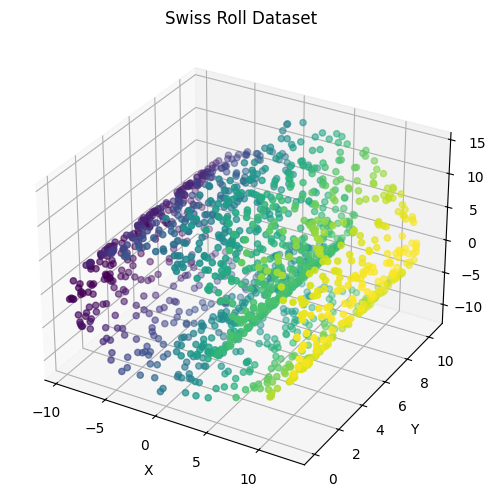

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

# Generate data (Swiss Roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)

# Make it thinner by scaling the second dimension
X[:, 1] *= 0.5

# Plot the Swiss Roll dataset
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0], cmap='viridis')
ax.set_title("Swiss Roll Dataset")
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
plt.show()


This code generates a Swiss Roll dataset with 1500 points and 5% noise.(X[:, 0], X[:, 1], X[:, 2] represents the three dimensions X, Y and Z. X[:, 1] *= .5 scales the second dimension (Y-axis) by 0.5, making the Swiss Roll thinner along the Y-axis. The data is then visualized in 3D using matplotlib with a scatter plot, where points are colored according to the first dimension.

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a), where you set the parameters as n_clusters=6, connectivity=connectivity, linkage='ward', where<br>
from sklearn.neighbors import kneighbors_graph<br>
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)<br>
Plot the clustered data in a 3D figure and use different colors for different clusters in your figure.**

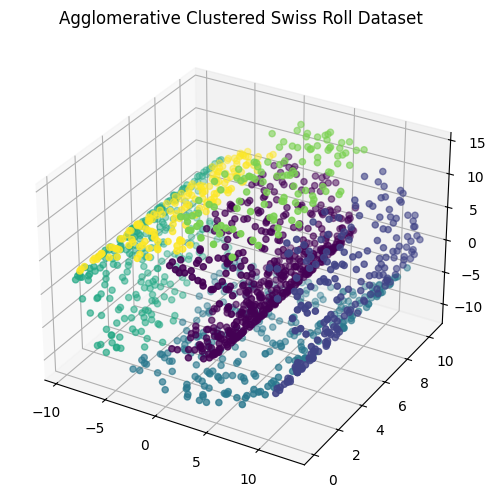

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate data (Swiss Roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)

# Make it thinner by scaling the second dimension
X[:, 1] *= 0.5

# Create connectivity matrix using kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

# Perform Agglomerative Clustering
aggl_clustering = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward')
aggl_labels = aggl_clustering.fit_predict(X)

# Plot the clustered Swiss Roll dataset
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for different clusters
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=aggl_labels, cmap='viridis')
ax.set_title("Agglomerative Clustered Swiss Roll Dataset")
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")

plt.show()

This code generates a 3D “Swiss Roll” dataset, applies agglomerative clustering to identify clusters, and visualizes the clusters in a 3D plot. Using make_swiss_roll, it creates a synthetic dataset of 1500 points with some noise, then scales the Y-dimension by 0.5 to make the roll thinner. Using kneighbors_graph, a connectivity matrix is created to link each data point with its 10 nearest neighbors. This matrix encourages the clustering to preserve the dataset’s structure. The code applies hierarchical (agglomerative) clustering to X, specifying six clusters. The Ward linkage method is used which minimizes variance within clusters and leverages the connectivity matrix to improve structure-based clustering. Visualization of the clustered data in a 3D scatter is performed by plotting it using matplotlib, with viridis colormap colors to distinguish clusters and displaying distinct clusters with different colors that highlight spatial relationships in the Swiss Roll structure.

**(c) Use sklearn.cluster.DBSCAN to cluster the points generated in (a). Plot the clustered data in a 3D figure and use different colors different clusters in your figure. Discuss and compare the results of DBSCAN with the results in (b).**

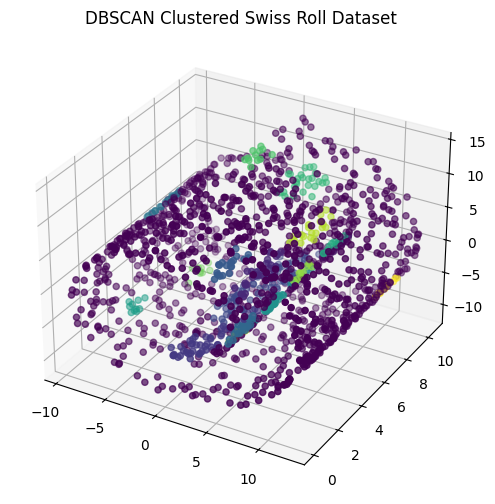

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import DBSCAN

# Generate data (Swiss Roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)

# Make it thinner by scaling the second dimension
X[:, 1] *= 0.5

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.0, min_samples=10)
# dbscan = DBSCAN(eps=0.5, min_samples=10)
# dbscan = DBSCAN(eps=1.5, min_samples=10)
# dbscan = DBSCAN(eps=1, min_samples=5)
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the clustered Swiss Roll dataset using DBSCAN
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=dbscan_labels, cmap='viridis')
ax.set_title("DBSCAN Clustered Swiss Roll Dataset")
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
plt.show()

**Comparision between Aggelomerative and DBscan:**

Agglomerative Clustering is a hierarchical method that begins by treating each point as its own cluster, merging them iteratively based on proximity. Using ward linkage and a connectivity graph, it creates compact clusters that minimize intra-cluster variance. However, it requires specifying the number of clusters (n_clusters) in advance and may struggle with non-linear structures like the Swiss Roll, leading to clusters that don’t align with its spiral geometry. The results are more influenced by the graph connectivity, which can result in splits or mergers that ignore the dataset's inherent shape.

DBSCAN is a density-based algorithm that groups points based on neighborhood density. It automatically identifies clusters of varying shapes without needing a predefined number of clusters, making it better suited for datasets like the Swiss Roll. DBSCAN effectively follows the non-linear spiral structure, identifying dense regions as clusters and leaving sparse points as noise. However, its performance depends heavily on the eps and min_samples parameters; poor choices can lead to merged or fragmented clusters. Here experiment performed with different values of eps and min_samples, best result is plotted for visualization.

In summary, Agglomerative Clustering is ideal for datasets with a clear global structure and a known number of clusters, while DBSCAN excels at uncovering non-linear structures and handling noise. For the Swiss Roll, DBSCAN generally provides more meaningful clusters that respect its geometry, whereas Agglomerative Clustering may produce less natural groupings.